## DATASET BANK-MARKETING  

Aluno: Nickolas Crema

Professor: Andre Gustavo Maletzke

### Objetivos do dataset:  

O dataset se baseia em marketing de campanhas realizadas por telefone de um banco português. O objetivo da classificação é predizer se o cliente vai subscrever um depósito a prazo ou não.  

link do dataset: https://www.openml.org/search?type=data&sort=runs&id=1461&status=active"

### Features


O dataset contém 17 "features"  
V1 - A idade do cliente - Númerico  
V2 - O tipo de trabalho que o cliente exerce - Categórico (\"admin.\", \"unknown\", \"unemployed\", \"management\", \"housemaid\", \"entrepreneur\", \"student\", \"blue-collar\", \"self-employed\", \"retired\", \"technician\", \"services\")  
V3 - O estado cívil do cliente - Categórico  (\"married\", \"divorced\", \"single\"; note: \"divorced\" means divorced or widowed)  
V4 - Nível de escolaridade do cliente - Categórico (\"unknown\", \"secondary\", \"primary\", \"tertiary\")  
V5 - Se o cliente tem crédito inadimplente - Binário (\"yes\", \"no\")  
V6 - Saldo médio anual - Númerico  
V7 - Se o cliente tem crédito habitacional - Binário (\"yes\", \"no\")  
V8 - Se o cliente tem empréstimo pessoal - Binário (\"yes\", \"no\")   
V9 - Meio de contato - Númerico  
V10 - O último dia de contato do mês - Categórico (\"unknown\", \"telephone\", \"cellular\")  
V11 - O último mês de contato do ano - Categórico (\"jan\", \"feb\", \"mar\", ..., \"nov\", \"dec\")  
V12 - A duração do último contato - Númerico  
V13 - Número de contatos realizados nesta campanha para este cliente - Númerico  
V14 - Número de dias que se passaram desde que o cliente foi contatado pela última vez em uma campanha anterior - Númerico  
V15 - Número de contactos realizados antes desta campanha e para este cliente - Númerico  
V16 - Resultado da campanha anterior para este cliente - Categórico  
V17 - target y - Se o cliente subscreveu ao depósito a prazo ou não - Binário (\"yes\", \"no\") 

### Hipóteses  

H1: Só é possível prever a inscrição se houver todos os atributos do dataset envolvidos no treino?  
H2: Existe um par atributos que possuem influência direta sobre a classificação? Quais?

### Lendo o dataset

In [1]:
import pandas as pd
from scipy.io.arff import loadarff
import numpy as np
import seaborn as sns
import warnings
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection

In [31]:
raw_data = loadarff('dataset.arff')
df = pd.DataFrame(raw_data[0])
df.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,Class
0,58.0,b'management',b'married',b'tertiary',b'no',2143.0,b'yes',b'no',b'unknown',5.0,b'may',261.0,1.0,-1.0,0.0,b'unknown',b'1'
1,44.0,b'technician',b'single',b'secondary',b'no',29.0,b'yes',b'no',b'unknown',5.0,b'may',151.0,1.0,-1.0,0.0,b'unknown',b'1'


### Renomeando as colunas do dataset

In [32]:
df.rename(columns={'V1': 'age', 'V2': 'job', 'V3': 'marital', 'V4': 'education', 'V5': 'default_in_credit', 'V6': 'balance', 'V7': 'housing_loan', 'V8': 'personal_loan', 'V9': 'contact', 'V10': 'last_day_contact_of_month', 'V11': 'last_month_contact_of_year', 'V12': 'contact_duration', 'V13': 'number_of_contacts_performed_during_campaign', 'V14': 'last_contact_of_previous_campaign', 'V15': 'number_of_contact_of_previous_campaign', 'V16': 'outcome_of_previous_campaign', 'Class': 'has_subscribed'}, inplace = True)
df.head(10)

,age,job,marital,education,default_in_credit,balance,housing_loan,personal_loan,contact,last_day_contact_of_month,last_month_contact_of_year,contact_duration,number_of_contacts_performed_during_campaign,last_contact_of_previous_campaign,number_of_contact_of_previous_campaign,outcome_of_previous_campaign,has_subscribed
0,58.0,b'management',b'married',b'tertiary',b'no',2143.0,b'yes',b'no',b'unknown',5.0,b'may',261.0,1.0,-1.0,0.0,b'unknown',b'1'
1,44.0,b'technician',b'single',b'secondary',b'no',29.0,b'yes',b'no',b'unknown',5.0,b'may',151.0,1.0,-1.0,0.0,b'unknown',b'1'
2,33.0,b'entrepreneur',b'married',b'secondary',b'no',2.0,b'yes',b'yes',b'unknown',5.0,b'may',76.0,1.0,-1.0,0.0,b'unknown',b'1'
3,47.0,b'blue-collar',b'married',b'unknown',b'no',1506.0,b'yes',b'no',b'unknown',5.0,b'may',92.0,1.0,-1.0,0.0,b'unknown',b'1'
4,33.0,b'unknown',b'single',b'unknown',b'no',1.0,b'no',b'no',b'unknown',5.0,b'may',198.0,1.0,-1.0,0.0,b'unknown',b'1'
5,35.0,b'management',b'married',b'tertiary',b'no',231.0,b'yes',b'no',b'unknown',5.0,b'may',139.0,1.0,-1.0,0.0,b'unknown',b'1'
6,28.0,b'management',b'single',b'tertiary',b'no',447.0,b'yes',b'yes',b'unknown',5.0,b'may',217.0,1.0,-1.0,0.0,b'unknown',b'1'
7,42.0,b'entrepreneur',b'divorced',b'tertiary',b'yes',2.0,b'yes',b'no',b'unknown',5.0,b'may',380.0,1.0,-1.0,0.0,b'unknown',b'1'
8,58.0,b'retired',b'married',b'primary',b'no',121.0,b'yes',b'no',b'unknown',5.0,b'may',50.0,1.0,-1.0,0.0,b'unknown',b'1'
9,43.0,b'technician',b'single',b'secondary',b'no',593.0,b'yes',b'no',b'unknown',5.0,b'may',55.0,1.0,-1.0,0.0,b'unknown',b'1'


### Transformando dados

Excluindo coluna de forma de contato pois é um atributo irrelevante para classificação

In [33]:
df = df.drop(['contact'], axis=1)

Transformando atributo categórico de tipo de profissão para valor numérico

In [34]:
df_job = pd.get_dummies(df['job'])
dict_job = {}
i=0
for job in df_job.columns.values:
    dict_job[job] = i
    i+=1
for job in dict_job.keys():
    df['job'].loc[(df['job'] == job)] = dict_job[job]
    warnings.filterwarnings('ignore')
df_job

,b'admin.',b'blue-collar',b'entrepreneur',b'housemaid',b'management',b'retired',b'self-employed',b'services',b'student',b'technician',b'unemployed',b'unknown'
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,0,1,0,0
45207,0,0,0,0,0,1,0,0,0,0,0,0
45208,0,0,0,0,0,1,0,0,0,0,0,0
45209,0,1,0,0,0,0,0,0,0,0,0,0


Transformando atributo categórico de estado civil para valor numérico

In [35]:
df_marital = pd.get_dummies(df['marital'])
dict_marital = {b'single': 0, b'married': 1, b'divorced': 2}
for marital in dict_marital.keys():
    df['marital'].loc[(df['marital'] == marital)] = dict_marital[marital]
    warnings.filterwarnings('ignore')
df_marital

,b'divorced',b'married',b'single'
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1
...,...,...,...
45206,0,1,0
45207,1,0,0
45208,0,1,0
45209,0,1,0


Transformando atributos binários para valor numérico

In [36]:
df['default_in_credit'].loc[(df['default_in_credit'] == b'no')] = 0
df['default_in_credit'].loc[(df['default_in_credit'] == b'yes')] = 1
df['housing_loan'].loc[(df['housing_loan'] == b'no')] = 0
df['housing_loan'].loc[(df['housing_loan'] == b'yes')] = 1
df['personal_loan'].loc[(df['personal_loan'] == b'no')] = 0
df['personal_loan'].loc[(df['personal_loan'] == b'yes')] = 1
df['last_contact_of_previous_campaign'].loc[(df['last_contact_of_previous_campaign'] == -1.0)] = 0

Transformando atributo categórico de nível de escolaridade para valor numérico

In [37]:
df_education = pd.get_dummies(df['education'])
dict_education = {b'unknown': 0, b'primary': 1, b'secondary': 2, b'tertiary': 3}
for education in dict_education.keys():
    df['education'].loc[(df['education'] == education)] = dict_education[education]
    warnings.filterwarnings('ignore')
df_education

,b'primary',b'secondary',b'tertiary',b'unknown'
0,0,0,1,0
1,0,1,0,0
2,0,1,0,0
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
45206,0,0,1,0
45207,1,0,0,0
45208,0,1,0,0
45209,0,1,0,0


Transformando atributo categórico de resultado de campanhas anteriores para valor numérico

In [38]:
df_outcome_previous = pd.get_dummies(df['outcome_of_previous_campaign'])
previous_outcome_campaign_dict = {b'failure': 0, b'success': 1, b'other': 2, b'unknown': 3}
for previous_outcome in previous_outcome_campaign_dict.keys():
    df['outcome_of_previous_campaign'].loc[(df['outcome_of_previous_campaign'] == previous_outcome)] = previous_outcome_campaign_dict[previous_outcome]
    warnings.filterwarnings('ignore')

Transformando atributo categórico de mês do último contato para valor numérico

In [39]:
month_dict = {b'jan': 1, b'feb': 2, b'mar': 3, b'apr': 4, b'may': 5, b'jun': 6, b'jul': 7, b'aug': 8, b'sep': 9, b'oct': 10, b'nov': 11, b'dec': 12}
for month in month_dict.keys():
    df['last_month_contact_of_year'].loc[(df['last_month_contact_of_year'] == month)] = month_dict[month]
    warnings.filterwarnings('ignore')

Transformando a classe de binário para valor numérico

In [40]:
dict_subscribed = {b'1': 0, b'2': 1}
for subs in dict_subscribed.keys():
    df['has_subscribed'].loc[(df['has_subscribed'] == subs)] = dict_subscribed[subs]
    warnings.filterwarnings('ignore')

Deletando campos com dados faltantes

In [41]:
df.dropna(inplace=True)

DataFrame após transformações

In [42]:
df

,age,job,marital,education,default_in_credit,balance,housing_loan,personal_loan,last_day_contact_of_month,last_month_contact_of_year,contact_duration,number_of_contacts_performed_during_campaign,last_contact_of_previous_campaign,number_of_contact_of_previous_campaign,outcome_of_previous_campaign,has_subscribed
0,58.0,4,1,3,0,2143.0,1,0,5.0,5,261.0,1.0,0.0,0.0,3,0
1,44.0,9,0,2,0,29.0,1,0,5.0,5,151.0,1.0,0.0,0.0,3,0
2,33.0,2,1,2,0,2.0,1,1,5.0,5,76.0,1.0,0.0,0.0,3,0
3,47.0,1,1,0,0,1506.0,1,0,5.0,5,92.0,1.0,0.0,0.0,3,0
4,33.0,11,0,0,0,1.0,0,0,5.0,5,198.0,1.0,0.0,0.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,9,1,3,0,825.0,0,0,17.0,11,977.0,3.0,0.0,0.0,3,1
45207,71.0,5,2,1,0,1729.0,0,0,17.0,11,456.0,2.0,0.0,0.0,3,1
45208,72.0,5,1,2,0,5715.0,0,0,17.0,11,1127.0,5.0,184.0,3.0,1,1
45209,57.0,1,1,2,0,668.0,0,0,17.0,11,508.0,4.0,0.0,0.0,3,0


### Selecionando Atributos

Utilizando Recursive Feature Elimination para selecionar o par de atributos mais relevantes do dataset

In [43]:
x = df.drop(['has_subscribed'], axis= 1)
y = df['has_subscribed']
y = y.astype(int)
model= RandomForestClassifier()
model.fit(x,y)
rfe=RFE(model, n_features_to_select=2, verbose=2)
fit=rfe.fit(x,y)

Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.


Resultado do algoritmo, sendo True os atributos selecionados e False os atributos descartados

In [44]:
rfe.support_

array([False, False, False, False, False,  True, False, False, False,
       False,  True, False, False, False, False])

Removendo do dataset os atributos descartados

In [45]:
remove = []
for i, col in enumerate(df.drop(['has_subscribed'], axis=1).columns.values):
    if rfe.support_[i] == False:
        remove.append(col)
for r in remove:
    df.drop([r], axis=1, inplace=True)

Dataset após a remoção dos atributos descartados

In [46]:
df

,balance,contact_duration,has_subscribed
0,2143.0,261.0,0
1,29.0,151.0,0
2,2.0,76.0,0
3,1506.0,92.0,0
4,1.0,198.0,0
...,...,...,...
45206,825.0,977.0,1
45207,1729.0,456.0,1
45208,5715.0,1127.0,1
45209,668.0,508.0,0


### KNN Default com dados desbalanceados

Analisando os dados podemos ver que a classe está desbalanceada, aplicaremos o KNN nos dados sem realizar um balanceamento, para visualizar sua precisão e a quantidade de FP e FN

<AxesSubplot:xlabel='has_subscribed', ylabel='count'>

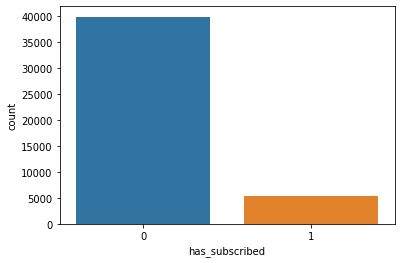

In [47]:
sns.countplot(x= 'has_subscribed', data=df)

Coletando os dados de treino e teste

In [48]:
x = df.drop('has_subscribed', axis= 1)
y = df['has_subscribed']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, shuffle=True)
y_train = y_train.astype(int)
y_test = y_test.astype(int)


Declarando a variável para KNN

In [49]:
knn = KNeighborsClassifier(n_neighbors=3)

Aplicando KNN nos dados

In [50]:
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
y_proba = knn.predict_proba(x_test)[:,1]

#### Resultados do modelo

Relatório de classificação: 
               precision    recall  f1-score   support

           0     0.9022    0.9462    0.9237      9981
           1     0.3569    0.2254    0.2763      1322

    accuracy                         0.8619     11303
   macro avg     0.6295    0.5858    0.6000     11303
weighted avg     0.8384    0.8619    0.8479     11303

Acurácia: 0.8619

AUC: 0.5858



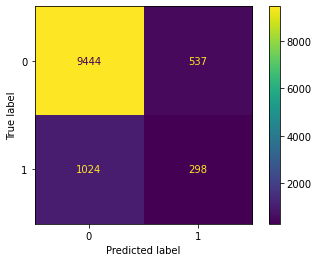

In [51]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()
print('Relatório de classificação: \n', classification_report(y_test, y_pred, digits=4))
print('Acurácia: {:.4f}\n'.format(accuracy_score(y_test, y_pred)))
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))


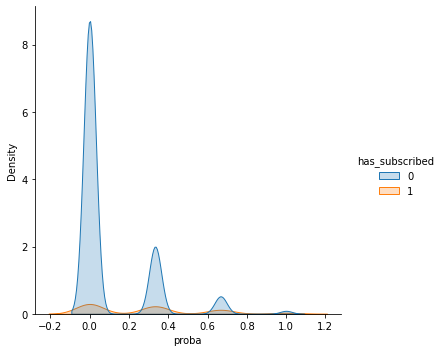

In [52]:
y_pred_proba = knn.predict_proba(x_test)
pos_prob = pd.DataFrame(y_pred_proba[np.where(y_test==0),1][0])
pos_prob['has_subscribed'] = 0

neg_prob = pd.DataFrame(y_pred_proba[np.where(y_test==1),1][0])
neg_prob['has_subscribed'] = 1

prob_pred = pd.concat([pos_prob, neg_prob], axis=0, ignore_index= True)
prob_pred.columns = ['proba', 'has_subscribed']
prob_pred
sns.displot(prob_pred, x='proba', kind='kde', fill=True, hue='has_subscribed')

Podemos visualizar uma alta taxa de FP, além de uma acurácia não tão desejada.

### KNN Default com dados balanceados

Balancearemos os dados utilizando Oversampling e Undersampling para verificar qual obtém melhor eficiência

Declarando as variáveis para undersampling e oversampling

In [53]:
under_sampler = RandomUnderSampler(random_state=32)
over_sampler = RandomOverSampler(random_state=32)

#### KNN com undersampling

Aplicando undersampling nos dados de treino

1    3967
0    3966
Name: has_subscribed, dtype: int64


<AxesSubplot:xlabel='has_subscribed', ylabel='count'>

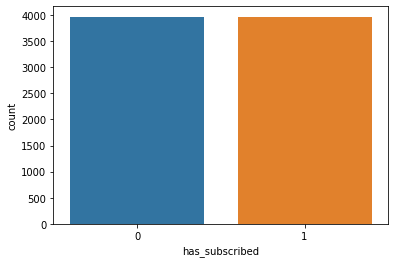

In [54]:
y_int = y.astype(int)
x_rus, y_rus = under_sampler.fit_resample(x, y_int)
x_rus_train, x_rus_test, y_rus_train, y_rus_test = train_test_split(x_rus, y_rus, stratify=y_rus, shuffle=True)
print(pd.Series(y_rus_train).value_counts())
sns.countplot(x=y_rus_train)

Aplicação do algoritmo KNN nos dados de treino, e predição dos dados de teste, balanceados com undersampling

In [55]:
knn.fit(x_rus_train, y_rus_train)
y_rus_pred = knn.predict(x_rus_test)
y_rus_proba = knn.predict_proba(x_rus_test)[:,1]

##### Resultados do modelo balanceado com undersampling

Relatório de classificação: 
               precision    recall  f1-score   support

           0     0.7056    0.6901    0.6977      1323
           1     0.6965    0.7118    0.7041      1322

    accuracy                         0.7009      2645
   macro avg     0.7010    0.7009    0.7009      2645
weighted avg     0.7010    0.7009    0.7009      2645

Acurácia: 0.7009

AUC: 0.7522



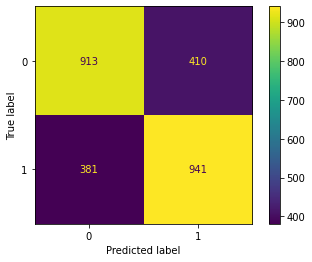

In [56]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_rus_test, y_rus_pred)).plot()
print('Relatório de classificação: \n', classification_report(y_rus_test, y_rus_pred, digits=4))
print('Acurácia: {:.4f}\n'.format(accuracy_score(y_rus_test, y_rus_pred)))
print("AUC: {:.4f}\n".format(roc_auc_score(y_rus_test, y_rus_proba)))


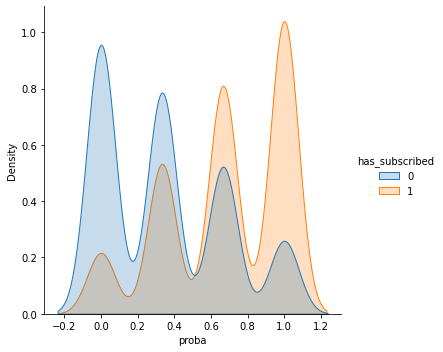

In [57]:
y_pred_proba = knn.predict_proba(x_rus_test)
pos_prob = pd.DataFrame(y_pred_proba[np.where(y_rus_test==0),1][0])
pos_prob['has_subscribed'] = 0

neg_prob = pd.DataFrame(y_pred_proba[np.where(y_rus_test==1),1][0])
neg_prob['has_subscribed'] = 1

prob_pred = pd.concat([pos_prob, neg_prob], axis=0, ignore_index= True)
prob_pred.columns = ['proba', 'has_subscribed']
prob_pred
sns.displot(prob_pred, x='proba', kind='kde', fill=True, hue='has_subscribed')

Analisando os resultados vemos um balanceamento na taxa de acertos para as duas classes, porém com uma taxa baixa de acertos em ambos os lados

#### KNN com oversampling

Agora utilizaremos balancearemos os dados utilizando Oversampling

0    29942
1    29941
Name: has_subscribed, dtype: int64


<AxesSubplot:xlabel='has_subscribed', ylabel='count'>

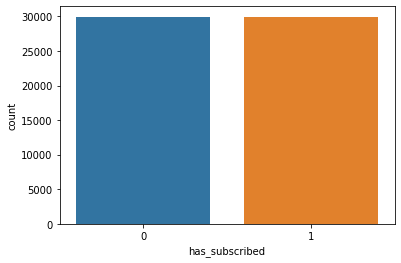

In [58]:
x_ros, y_ros = over_sampler.fit_resample(x, y_int)
x_ros_train, x_ros_test, y_ros_train, y_ros_test = train_test_split(x_ros, y_ros, stratify=y_ros, shuffle=True)
print(pd.Series(y_ros_train).value_counts())
sns.countplot(x=y_ros_train)

Aplicação do algoritmo KNN nos dados de treino, e predição dos dados de teste, balanceados com Oversampling

In [59]:
knn.fit(x_ros_train, y_ros_train)
y_ros_pred = knn.predict(x_ros_test)
y_ros_proba = knn.predict_proba(x_ros_test)[:,1]

##### Resultados do modelo balanceado com Oversampling

Relatório de classificação: 
               precision    recall  f1-score   support

           0     0.9773    0.7897    0.8735      9980
           1     0.8236    0.9817    0.8957      9981

    accuracy                         0.8857     19961
   macro avg     0.9004    0.8857    0.8846     19961
weighted avg     0.9004    0.8857    0.8846     19961

Acurácia: 0.8857

AUC: 0.9331



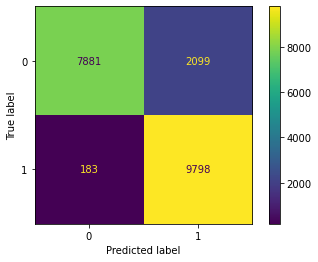

In [60]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_ros_test, y_ros_pred)).plot()
print('Relatório de classificação: \n', classification_report(y_ros_test, y_ros_pred, digits=4))
print('Acurácia: {:.4f}\n'.format(accuracy_score(y_ros_test, y_ros_pred)))
print("AUC: {:.4f}\n".format(roc_auc_score(y_ros_test, y_ros_proba)))


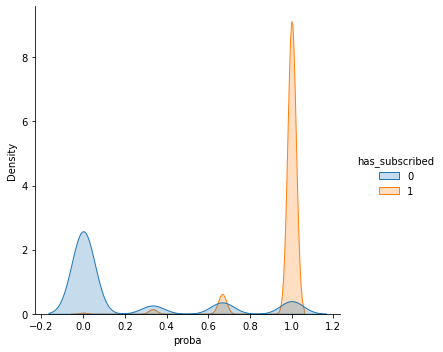

In [61]:
y_pred_def_proba = knn.predict_proba(x_ros_test)
pos_prob = pd.DataFrame(y_pred_def_proba[np.where(y_ros_test==0),1][0])
pos_prob['has_subscribed'] = 0

neg_prob = pd.DataFrame(y_pred_def_proba[np.where(y_ros_test==1),1][0])
neg_prob['has_subscribed'] = 1

prob_pred_default = pd.concat([pos_prob, neg_prob], axis=0, ignore_index= True)
prob_pred_default.columns = ['proba', 'has_subscribed']
prob_pred_default
sns.displot(prob_pred_default, x='proba', kind='kde', fill=True, hue='has_subscribed')

Analisando os resultados podemos verificar uma alta taxa de acertos da classe positiva, porém uma baixa taxa de acertos da classe negativa

### KNN melhorado

Utilização do GridSearchCV para definir os melhores parâmetros para o modelo, afim de otimizar a perfomance

In [62]:
knn_melhorado = KNeighborsClassifier()
parameters = {'n_neighbors': np.arange(1, 25)}
gscv = GridSearchCV(knn_melhorado, parameters, cv=5)
model = gscv.fit(x_ros_train, y_ros_train)
print('Melhor n_neighbors:', model.best_estimator_.get_params()['n_neighbors'])
y_ros_melhorado_pred = model.predict(x_ros_test)
y_ros_melhorado_proba = model.predict_proba(x_ros_test)[:,1]

Melhor n_neighbors: 1


#### Resultados do modelo melhorado

Relatório de classificação: 
               precision    recall  f1-score   support

           0     0.9849    0.8742    0.9263      9980
           1     0.8870    0.9866    0.9341      9981

    accuracy                         0.9304     19961
   macro avg     0.9359    0.9304    0.9302     19961
weighted avg     0.9359    0.9304    0.9302     19961

Acurácia: 0.9304

AUC: 0.9304



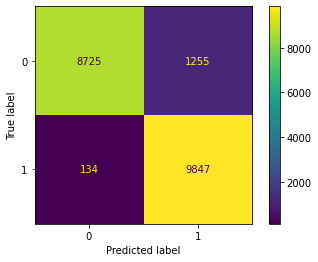

In [63]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_ros_test, y_ros_melhorado_pred)).plot()
print('Relatório de classificação: \n', classification_report(y_ros_test, y_ros_melhorado_pred, digits=4))
print('Acurácia: {:.4f}\n'.format(accuracy_score(y_ros_test, y_ros_melhorado_pred)))
print("AUC: {:.4f}\n".format(roc_auc_score(y_ros_test, y_ros_melhorado_proba)))


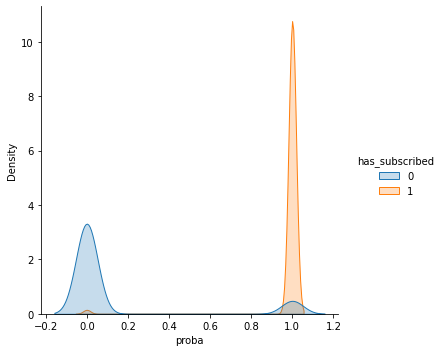

In [64]:
y_pred_otm_proba = model.predict_proba(x_ros_test)
pos_prob = pd.DataFrame(y_pred_otm_proba[np.where(y_ros_test==0),1][0])
pos_prob['has_subscribed'] = 0

neg_prob = pd.DataFrame(y_pred_otm_proba[np.where(y_ros_test==1),1][0])
neg_prob['has_subscribed'] = 1

prob_pred_melhorado = pd.concat([pos_prob, neg_prob], axis=0, ignore_index= True)
prob_pred_melhorado.columns = ['proba', 'has_subscribed']
prob_pred_melhorado
sns.displot(prob_pred_melhorado, x='proba', kind='kde', fill=True, hue='has_subscribed')

### Default vs Melhorado

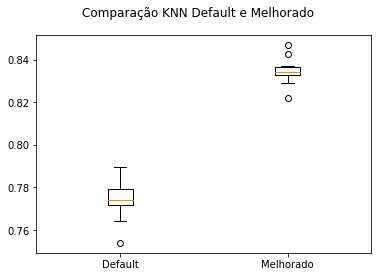

In [65]:
models = [('Default', knn), ('Melhorado', model)]
results = []
names = []
for name, modell in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(modell, x_ros_test, y_ros_test, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)

fig = plt.figure()
fig.suptitle('Comparação KNN Default e Melhorado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [66]:
print('Relatório de classificação Default: \n', classification_report(y_ros_test, y_ros_pred, digits=4))
print('Acurácia: {:.4f}\n'.format(accuracy_score(y_ros_test, y_ros_pred)))
print("AUC: {:.4f}\n\n".format(roc_auc_score(y_ros_test, y_ros_pred)))

print('Relatório de classificação Melhorado: \n', classification_report(y_ros_test, y_ros_melhorado_pred, digits=4))
print('Acurácia: {:.4f}\n'.format(accuracy_score(y_ros_test, y_ros_melhorado_pred)))
print("AUC: {:.4f}\n".format(roc_auc_score(y_ros_test, y_ros_melhorado_proba)))

Relatório de classificação Default: 
               precision    recall  f1-score   support

           0     0.9773    0.7897    0.8735      9980
           1     0.8236    0.9817    0.8957      9981

    accuracy                         0.8857     19961
   macro avg     0.9004    0.8857    0.8846     19961
weighted avg     0.9004    0.8857    0.8846     19961

Acurácia: 0.8857

AUC: 0.8857


Relatório de classificação Melhorado: 
               precision    recall  f1-score   support

           0     0.9849    0.8742    0.9263      9980
           1     0.8870    0.9866    0.9341      9981

    accuracy                         0.9304     19961
   macro avg     0.9359    0.9304    0.9302     19961
weighted avg     0.9359    0.9304    0.9302     19961

Acurácia: 0.9304

AUC: 0.9304



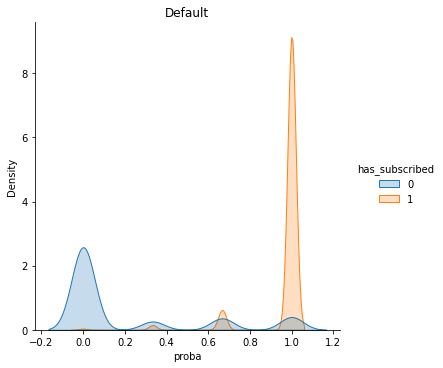

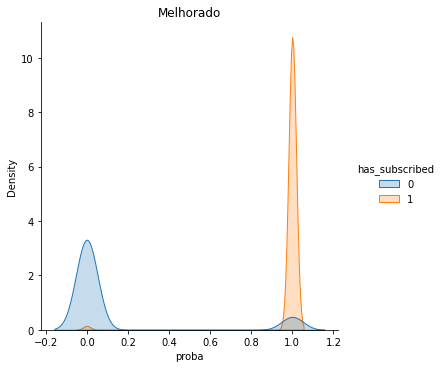

In [67]:
sns.displot(prob_pred_default, x='proba', kind='kde', fill=True, hue='has_subscribed').set(title='Default')

sns.displot(prob_pred_melhorado, x='proba', kind='kde', fill=True, hue='has_subscribed').set(title='Melhorado')

Podemos perceber uma melhora significativa nas taxas de FP e FN e um aumento consideravel de acurácia

### Conclusões

Analisando os resultados é possível concluir que a Hipótese 1 é falsa. É possível obter um classificador com uma boa taxa de acertos utilizando apenas dois atributos do dataset, o atributo de saldo médio anual (V6) e de duração do último contato (V12), o que confirma a segunda hipótese.